In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
num_data_points = 500

x = np.random.rand(num_data_points)
y_p = np.random.rand(num_data_points)

X = np.array([(x[i], y_p[i]) for i in range(num_data_points)])
y = []
for index in range(num_data_points):
    if y_p[index] > 3*(x[index]-0.5)**2 + 0.2:# and y_p[index] < 3*(x[index]-0.5)**2 + 0.55:
        y.append([1])
    else:
        y.append([0])

y=np.array(y)

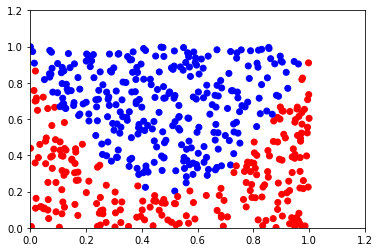

In [3]:
c = y.T[0]
c = np.where(c==0, 'red', c)
c = np.where(c=='1', 'blue', c)
plt.scatter(*zip(*X), c=c)
plt.xlim(0,1.2)
plt.ylim(0,1.2)
plt.show()

In [4]:
class node_class(object):
    def __init__(self, input_dim, learning_rate=0.1):
        #An array of weights, an additional weight is added for the dummy input `a_o = 1`
        self.W = np.random.rand(int(input_dim+1))
        self.learning_rate = learning_rate
        
    def relu_activation(self, t):
        self.final_output = np.max([0,t])
        return self.final_output
    
    def input_function(self, input_array):
        self.input_array = np.append(input_array,1)
        self.input_sum = np.sum(self.input_array * self.W)
        return self.input_sum
    
    #Consider removing
    def output(self, input_array):
        input_sum = self.input_function(input_array)
        return self.relu_activation(input_sum)
    
    def relu_der(self,t):
        if t>0:
            return 1
        else:
            return 0
        
    def calc_delta(self, actual_y=None, delta_js=None, weights=None, final_layer=False):
        if final_layer:
            self.delta = self.relu_der(self.input_sum)*(actual_y-self.final_output)
            return self.delta
        else:
            self.delta = self.relu_der(self.input_sum) * np.sum(np.array(weights) * delta_js)
            return self.delta
            
    def update_weights(self):
        self.W = self.W + (self.learning_rate * self.input_array * self.delta)

In [5]:
class NN(object):
    def __init__(self, layers, learning_rate=0.1):
        self.layers_nodes = []
        for i, num_nodes in enumerate(layers):
            if i==0:
                input_dim = num_nodes
                continue
                
            dim = input_dim
            self.layers_nodes.append([])
            for j in range(num_nodes):
                n = node_class(dim, learning_rate=learning_rate)
                self.layers_nodes[i-1].append(n)
                
            input_dim = num_nodes
            
    def evaluate(self, predictions, y, categorical=True):
        if categorical:
            evals = []
            preds = np.array(predictions)
            preds = np.round(preds)
            
            for i in range(len(y)):
                if np.array_equal(preds[i], y[i]):
                    evals.append(1)
                else:
                    evals.append(0)
                    
            evals = np.array(evals)
            return evals.mean()
            
    def predict(self, X, y):
        preds = []
        for index, i in enumerate(X):
            outputs = [i]
            for h, layer in enumerate(self.layers_nodes):
                outputs.append([])
                for node in layer:
                    output = node.output(outputs[h])
                    outputs[h+1].append(output)
                    
            preds.append(outputs[-1])
                        
        return preds
            
    def train(self, X, y, epochs):
        accs = []
        for j in range(epochs):
            predictions = self.predict(X, y)
            acc = self.evaluate(predictions,y)
            accs.append(acc)
            if j%100 == 0:
                print('epoch ', j)
                print('acc: ', acc)
            for index, i in enumerate(X):
                outputs = [i]
                for h, layer in enumerate(self.layers_nodes):
                    outputs.append([])
                    for node in layer:
                        output = node.output(outputs[h])
                        outputs[h+1].append(output)
                            
                delta_js = []
                layer_weights = []
                for h, layer in enumerate(reversed(self.layers_nodes)):
                    delta_js.append([])
                    layer_weights.append([])
                    for g, node in enumerate(layer):
                        if h == 0:
                            delta_j = node.calc_delta(actual_y=y[index][g], final_layer=True)
                            layer_weights[h].append(list(node.W))
                        else:
                            weights = []
                            for n in layer_weights[h-1]:
                                weights.append(n[g])
                            delta_j = node.calc_delta(delta_js=delta_js[h-1], weights=weights)
                            layer_weights[h].append(list(node.W))
                            
                        delta_js[h].append(delta_j)

                        node.update_weights()
        return accs

In [6]:
#Number of nodes for each layer
#     First number is the input dimension
#     Last number is the output dimension
layers = [2,3,3,3,3,3,1]
nn = NN(layers, learning_rate = 0.001)

In [7]:
accuracies = nn.train(X,y,500)

epoch  0
acc:  0.0
epoch  100
acc:  0.564
epoch  200
acc:  0.616
epoch  300
acc:  0.734
epoch  400
acc:  0.794


In [8]:
preds = nn.predict(X,y)
preds = np.round(preds)

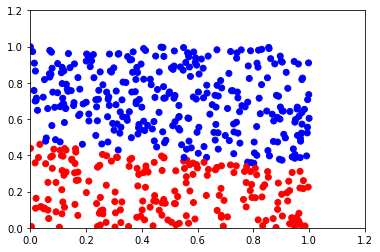

In [9]:
c = np.array(preds).T
c = np.where(c==0, 'red', c)
c = np.where(c=='1.0', 'blue', c)
c = np.where(c=='2.0', 'blue', c)
plt.scatter(*zip(*X), c=c[0])
plt.xlim(0,1.2)
plt.ylim(0,1.2)
#plt.axes().set_aspect('equal','datalim')
plt.show()

In [10]:
for layer in nn.layers_nodes:
    for node in layer:
        print(node.W)

[-0.11791076  0.39130418  0.48331258]
[0.25612541 0.55140369 0.31824448]
[0.17644599 0.85352072 0.15507132]
[0.72900713 0.64251333 0.76864683 0.15142283]
[ 0.72302286  0.46059771  0.13577912 -0.03676571]
[-8.32679219e-04  3.42586126e-01  8.34661569e-01  4.82332049e-01]
[0.45039088 0.07904939 0.49840668 0.65036796]
[ 0.23007598  0.94463331  0.32365479 -0.09712845]
[0.43135497 0.20603312 0.00661315 0.83670189]
[0.21649509 0.11899768 0.20600681 0.69625836]
[0.30386809 0.32720745 0.54331581 0.07349529]
[0.61527207 0.93960944 0.65201236 0.00232135]
[ 0.44862761 -0.05849808  0.86415318  0.61787125]
[0.87824624 0.07735577 0.21751558 0.69425789]
[0.27907761 0.33804025 0.02102512 0.11860679]
[ 0.43553819 -0.48197208  0.43096282 -0.46810966]


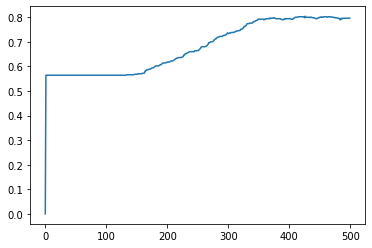

In [11]:
plt.plot(accuracies)

In [12]:
x_t = np.random.rand(num_data_points)
y_p_t = np.random.rand(num_data_points)

X_t = np.array([(x_t[i], y_p_t[i]) for i in range(num_data_points)])
y_t = []
for index in range(num_data_points):
    if y_p_t[index] > 3*(x_t[index]-0.5)**2 + 0.2:# and y_p[index] < 3*(x[index]-0.5)**2 + 0.55:
        y_t.append([1])
    else:
        y_t.append([0])

y_t=np.array(y_t)

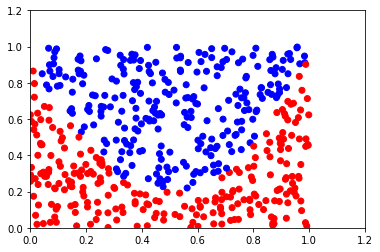

In [13]:
c = y_t.T[0]
c = np.where(c==0, 'red', c)
c = np.where(c=='1', 'blue', c)
plt.scatter(*zip(*X_t), c=c)
plt.xlim(0,1.2)
plt.ylim(0,1.2)
plt.show()

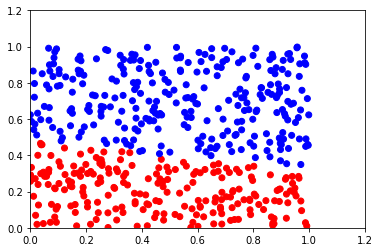

In [15]:
preds_t = nn.predict(X_t,y_t)
preds_t = np.round(preds_t)

c = np.array(preds_t).T
c = np.where(c==0, 'red', c)
c = np.where(c=='1.0', 'blue', c)
plt.scatter(*zip(*X_t), c=c[0])
plt.xlim(0,1.2)
plt.ylim(0,1.2)
#plt.axes().set_aspect('equal','datalim')
plt.show()